<p style="background-color:#3ab1c8;font-family:Cursive;font-size:200%;color:black;text-align:center;border-radius:120px 20px;padding:20px;margin:20px;"><b>Walmart Buy Box alma orani</b></p>

<p style="font-family:Cursive;font-size:100%;color:black;text-align:center;border-radius:10px 10px;"><b>by Nash</b></p>

<b style="font-family:Cursive;font-size:100%;color:black;text-align:right;border-radius:10px 10px;">Follow me [Linkedin](www.linkedin.com/in/nash-n-sungur-333869289) | [Git Hub](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0)</b>

Bu notebook ile Ime Brand sirketinin Walmart pazarinda satisa sundugu 1044 ürün ile ilgili bilgilerin bulundugu data setinden elde edilen bilgilerle olusuturulmus bir notebooktur. 

Bu notebookun amaci Sirketin Walmart pazari icin olusturdugu/tuttugu bazi bilgileri kullanarak, ürünün Boybox alma olasiligini belirleye bilmek.

Sunun net olarak bilinmesi gerekiyor ki, datasetinde Buy Box ile ilgili datasetinde yeterli veri olmadigi icin BU SONUCLAR GERCEGI YANSITMAMAKTADIR.  

In [9]:
!pip uninstall scikit-learn


  Using cached scikit-learn-1.1.2.tar.gz (7.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [66 lines of output]
  Partial import of sklearn during the build process.
  setup.py:128: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    from numpy.distutils.command.build_ext import build_ext  # noqa
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\Dell\anaconda3\Scripts\ANACONDA\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    Fil

  Using cached scikit-learn-1.1.2.tar.gz (7.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
^C


In [10]:
!pip install scikit-learn==1.1.2

^C


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [66 lines of output]
  Partial import of sklearn during the build process.
  setup.py:128: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    from numpy.distutils.command.build_ext import build_ext  # noqa
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\Dell\anaconda3\Scripts\ANACONDA\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    Fil

  Using cached scikit-learn-1.1.2.tar.gz (7.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


In [3]:
import sklearn
print(sklearn.__version__)

1.5.0


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.compose import make_column_transformer, ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Dell\anaconda3\Scripts\ANACONDA\Lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
df = pd.read_csv('Walmart_item_analyse.csv')
df.sample(2)

In [ ]:
df.info()

In [ ]:
df.drop(columns=['Unnamed: 0', 'SKU','Promo_Start_Date', 'Promo_End_Date', 
                 'Primary_Category_Path', 'Item_Creation_Date', 'Offer_Start_Date',
                        'Offer_End_Date'], inplace=True)

In [ ]:
df.describe().T

Buy Box Rate icin yeni bir sütun olusturuldu. Buy box fiyati ile Price degeri ayni olan ve kücük olan ürünler icin Buy box fiyati alindigi varsayilarak bu ürünler "1" olarak adlandirildi. Price degeri, Buy box fiyatindan büyük olan ürünler "0" olarak adlandirildi.

Model elde edilen sonuc 1 ise, Buy box alma ihtimalinin olumlu oldugu, 0 ise, Bu box alma ihtimalinin olumsuz oldugunu anlayabiliriz.

In [ ]:
print("buy box = price =", df[df['Buy_Box_Item_Price'] == df['Price']].shape)
print("buy box > price =", df[df['Buy_Box_Item_Price'] > df['Price']].shape)
print("buy box < price =", df[df['Buy_Box_Item_Price'] < df['Price']].shape)

In [ ]:
df["Buy_Box_Rate"] = 0
df.loc[df['Buy_Box_Item_Price'] == df['Price'], 'Buy_Box_Rate'] = 1
df.loc[df['Buy_Box_Item_Price'] > df['Price'], 'Buy_Box_Rate'] = 1

df.sample(2)

In [ ]:
df["Buy_Box_Rate"].value_counts()

In [ ]:
sns.barplot(df["Buy_Box_Rate"].value_counts());

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
sns.heatmap(df.corr());

In [ ]:
#sns.pairplot(df);

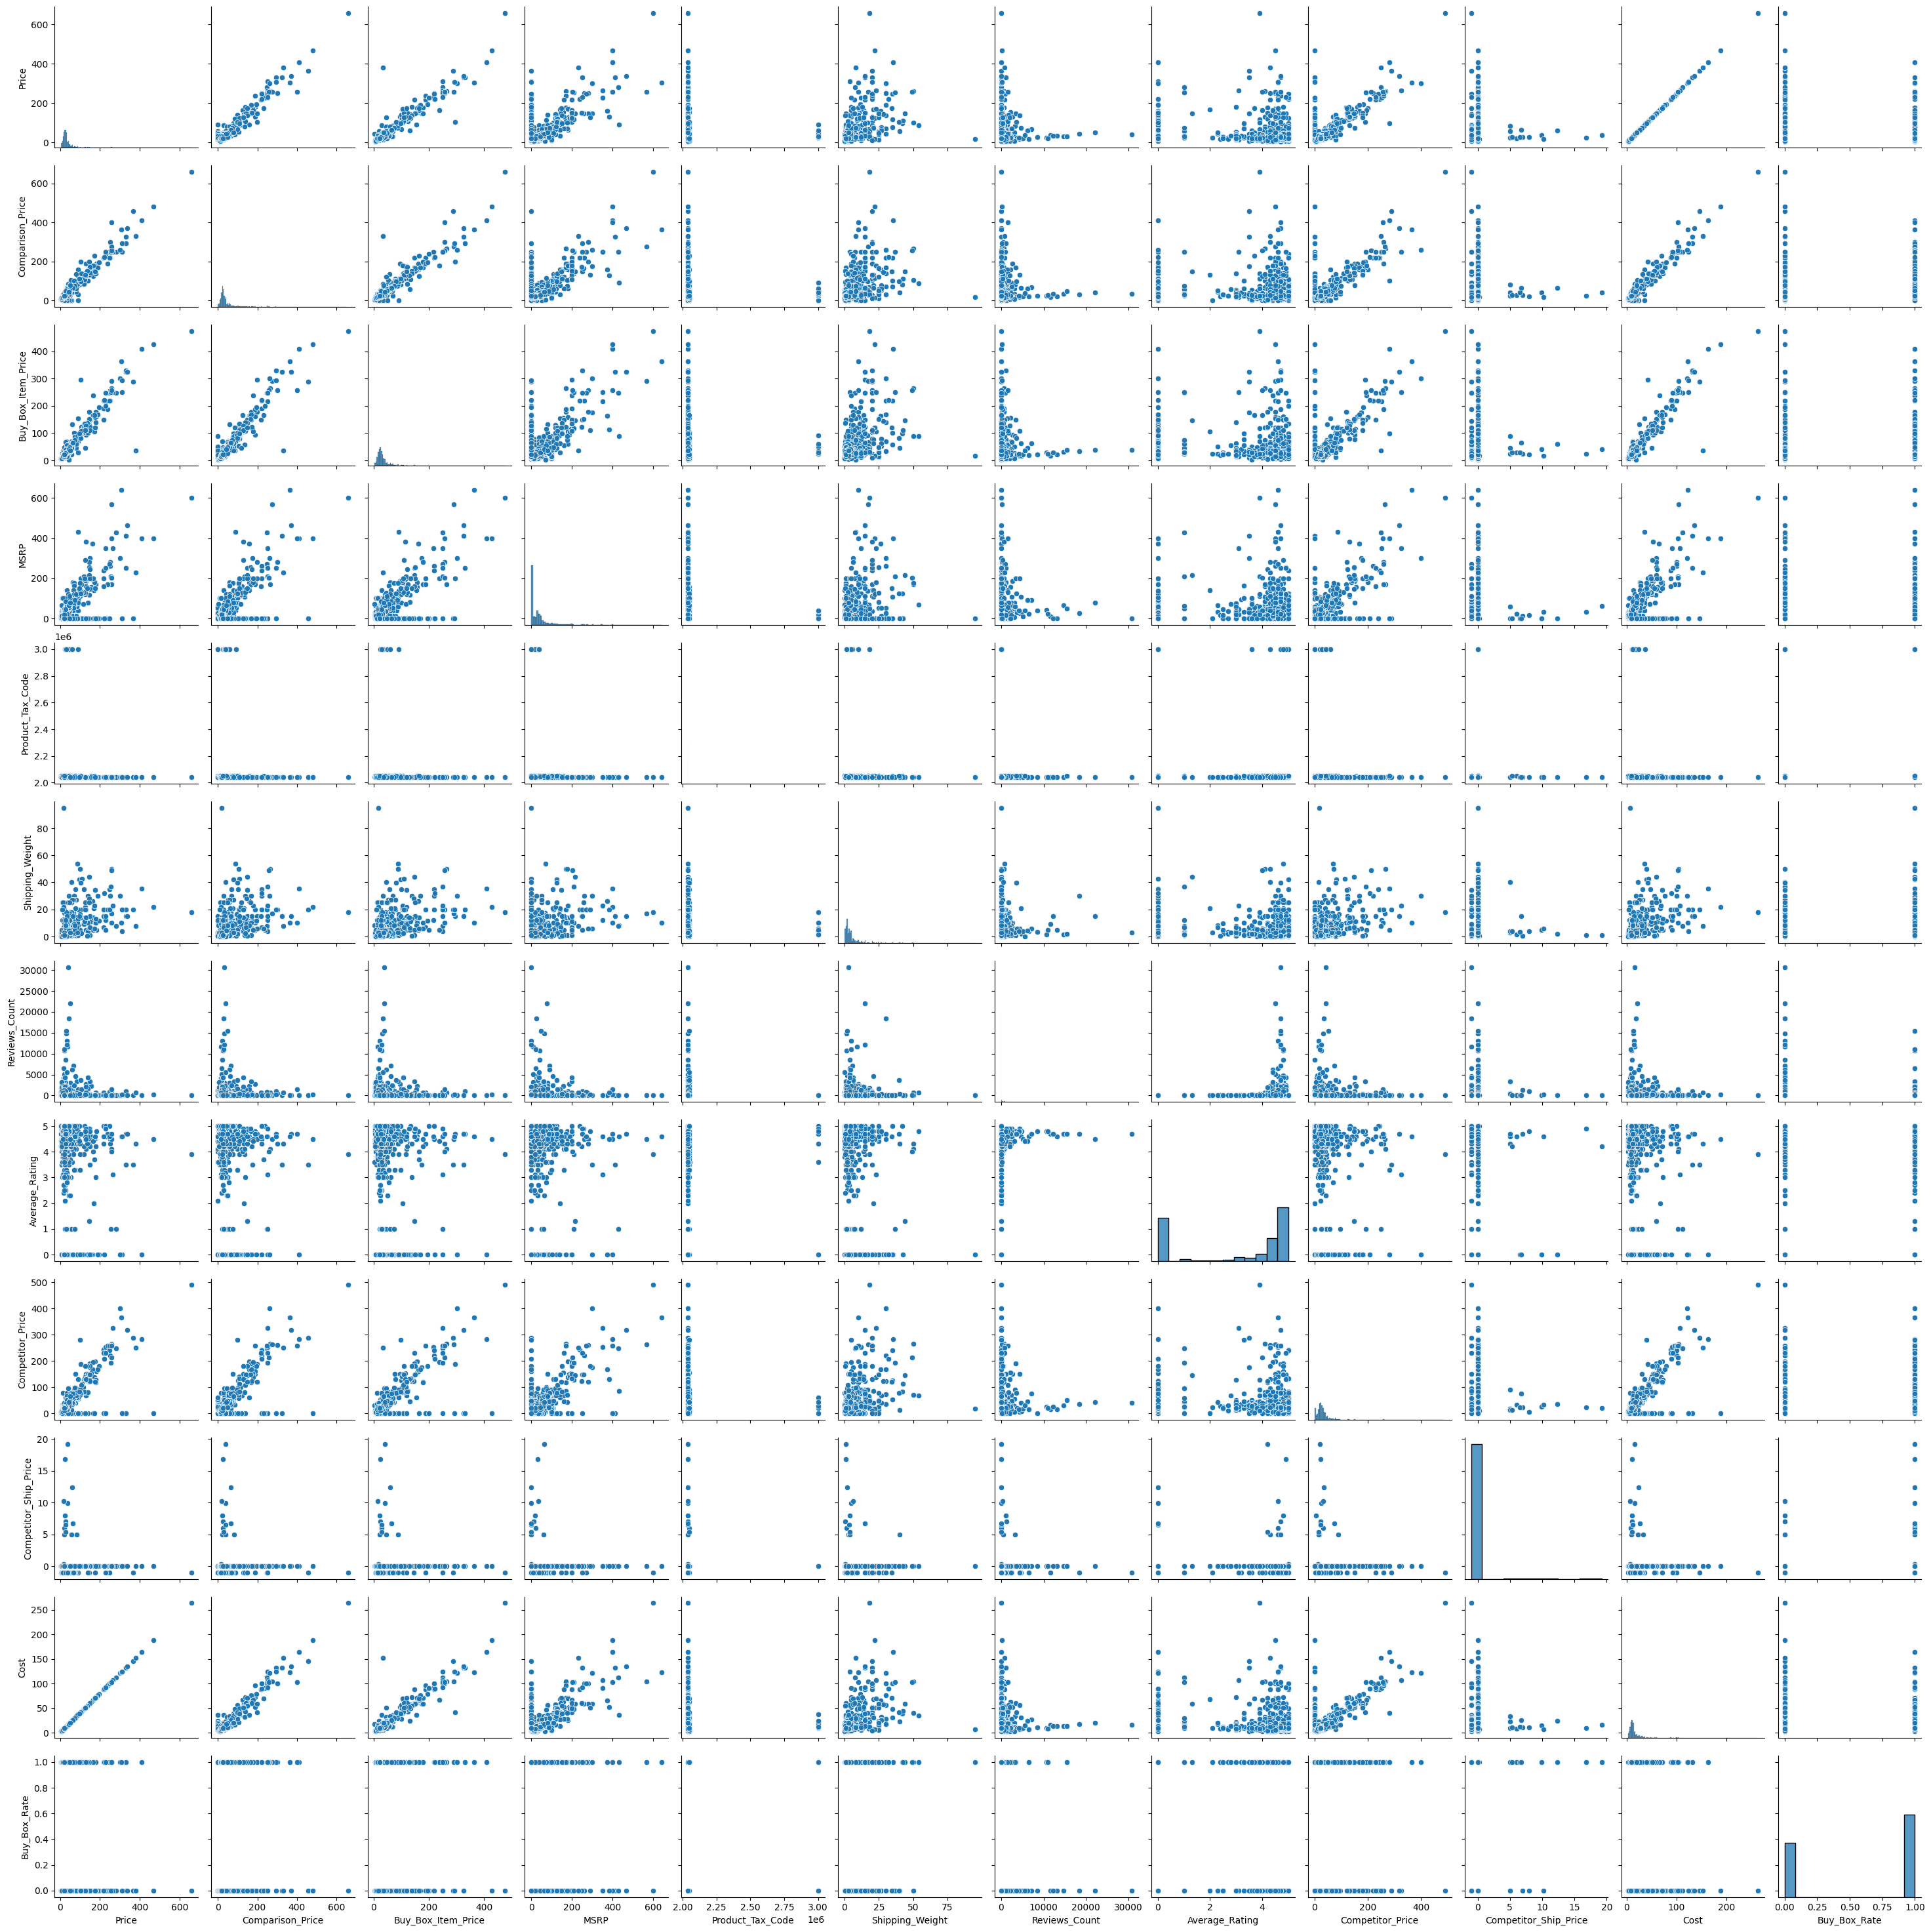

Evaluation 

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# Model

## model1 - Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Buy_Box_Rate'], axis=1)
y = df['Buy_Box_Rate']

scaler = StandardScaler()

y = pd.DataFrame(y)
y = y.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape)

In [ ]:
X.sample(2)

Encoder olarak OneHotEncoder secildi ve scaler olarak StandartScaler

In [ ]:
# OneHotEncoder ve StandardScaler transformer'ları
ordinal_features = ['Product_Name','Product_Category','Comparison_Price_Type','Buy_Box_Eligible','Ship_Methods',
                    'Fulfillment_Type','WFS_Sales_Restriction','Shelf_Name','Brand','Ship_Methods']
                     
numeric_features = ['Price','Buy_Box_Item_Price','MSRP','Product_Tax_Code','Shipping_Weight','Reviews_Count',
                    'Average_Rating','Competitor_Price','Competitor_Ship_Price','Cost']

ordinal_transformer = OneHotEncoder(handle_unknown="ignore", sparse=False)
numeric_transformer = StandardScaler()

# ColumnTransformer ile iki farklı transformer'ı birleştirme
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_features),
        ('num', numeric_transformer, numeric_features)])

# Logistic Regression model ile pipeline oluşturma
pipe_log_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))])

# Modeli eğitim verisiyle eğitme
pipe_log_model.fit(X_train, y_train)

### evalmetric

In [ ]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test ve Train sonuclari arasindaki sonuclar cok farkli oldugu icin modelin gelistirileye ihtyaci var.

In [ ]:
scoring = {"f1_score": make_scorer(f1_score, average='binary'),
           "precision_score": make_scorer(precision_score, average='binary'),
           "recall_score": make_scorer(recall_score, average='binary')}

scores = cross_validate(pipe_log_model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

Encoder olarak OneHotEncoder secildi ve scaler olarak MinMaxScaler

In [ ]:
# OneHotEncoder ve StandardScaler transformer'ları
ordinal_features = ['Product_Name','Product_Category','Comparison_Price_Type','Buy_Box_Eligible','Ship_Methods',
                    'Fulfillment_Type','WFS_Sales_Restriction','Shelf_Name','Brand','Ship_Methods']
                     
numeric_features = ['Price','Buy_Box_Item_Price','MSRP','Product_Tax_Code','Shipping_Weight','Reviews_Count',
                    'Average_Rating','Competitor_Price','Competitor_Ship_Price','Cost']

ordinal_transformer = OneHotEncoder(handle_unknown="ignore", sparse=False)
numeric_transformer = MinMaxScaler()

# ColumnTransformer ile iki farklı transformer'ı birleştirme
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_features),
        ('num', numeric_transformer, numeric_features)])

# Logistic Regression model ile pipeline oluşturma
pipe_log_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))])

# Modeli eğitim verisiyle eğitme
pipe_log_model.fit(X_train, y_train)

In [ ]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

In [ ]:
scoring = {"f1_score": make_scorer(f1_score, average='binary'),
           "precision_score": make_scorer(precision_score, average='binary'),
           "recall_score": make_scorer(recall_score, average='binary')}

scores = cross_validate(pipe_log_model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

Encoder olarak OrdinalEncoder ve scaler olarak StandartScaler secildi

In [ ]:
# OrdinalEncoder ve StandardScaler transformer'ları
ordinal_features = ['Product_Name','Product_Category','Comparison_Price_Type','Buy_Box_Eligible','Ship_Methods',
                    'Fulfillment_Type','WFS_Sales_Restriction','Shelf_Name','Brand','Ship_Methods']
                     
numeric_features = ['Price','Buy_Box_Item_Price','MSRP','Product_Tax_Code','Shipping_Weight','Reviews_Count',
                    'Average_Rating','Competitor_Price','Competitor_Ship_Price','Cost']

ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
numeric_transformer = StandardScaler()

# ColumnTransformer ile iki farklı transformer'ı birleştirme
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_features),
        ('num', numeric_transformer, numeric_features)])

# Logistic Regression model ile pipeline oluşturma
pipe_log_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))])

# Modeli eğitim verisiyle eğitme
pipe_log_model.fit(X_train, y_train)

In [ ]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

In [ ]:
scoring = {"f1_score": make_scorer(f1_score, average='binary'),
           "precision_score": make_scorer(precision_score, average='binary'),
           "recall_score": make_scorer(recall_score, average='binary')}

scores = cross_validate(pipe_log_model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

En tutarli sonuclar bu modelde elde edildigi icin en uygun model olarak belirlendi.

In [ ]:
log_scores = pd.DataFrame(scores)
log_f1_t = log_scores.mean()[2]
log_f1_T = log_scores.mean()[3]
log_recall_t = log_scores.mean()[6]
log_recall_T = log_scores.mean()[7]
log_precision_t = log_scores.mean()[4]
log_precision_T = log_scores.mean()[5]

## model2 - Lojistic Regression solver "liblenear" for small dataset

In [ ]:
# OneHotEncoder ve StandardScaler transformer'ları
ordinal_features = ['Product_Name','Product_Category','Comparison_Price_Type','Buy_Box_Eligible','Ship_Methods',
                    'Fulfillment_Type','WFS_Sales_Restriction','Shelf_Name','Brand','Ship_Methods']
                     
numeric_features = ['Price','Buy_Box_Item_Price','MSRP','Product_Tax_Code','Shipping_Weight','Reviews_Count',
                    'Average_Rating','Competitor_Price','Competitor_Ship_Price','Cost']

ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
numeric_transformer = StandardScaler()

# ColumnTransformer ile iki farklı transformer'ı birleştirme
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_features),
        ('num', numeric_transformer, numeric_features)])

# Logistic Regression model ile pipeline oluşturma
log_lib_pipe_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=10000, random_state=101,
                              solver="liblinear", penalty="l1"))])

# Modeli eğitim verisiyle eğitme
log_lib_pipe_model.fit(X_train, y_train)

In [ ]:
eval_metric(log_lib_pipe_model, X_train, y_train, X_test, y_test)

In [ ]:
scoring = {"f1_score": make_scorer(f1_score, average='binary'),
           "precision_score": make_scorer(precision_score, average='binary'),
           "recall_score": make_scorer(recall_score, average='binary')}

scores = cross_validate(log_lib_pipe_model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

In [ ]:
logLib_scores = pd.DataFrame(scores)
logLib_f1_t = logLib_scores.mean()[2]
logLib_f1_T = logLib_scores.mean()[3]
logLib_recall_t = logLib_scores.mean()[6]
logLib_recall_T = logLib_scores.mean()[7]
logLib_precision_t = logLib_scores.mean()[4]
logLib_precision_T = logLib_scores.mean()[5]

## model3 -Vanilla SVC model

In [ ]:
# OneHotEncoder ve StandardScaler transformer'ları
ordinal_features = ['Product_Name','Product_Category','Comparison_Price_Type','Buy_Box_Eligible','Ship_Methods',
                    'Fulfillment_Type','WFS_Sales_Restriction','Shelf_Name','Brand','Ship_Methods']
                     
numeric_features = ['Price','Buy_Box_Item_Price','MSRP','Product_Tax_Code','Shipping_Weight','Reviews_Count',
                    'Average_Rating','Competitor_Price','Competitor_Ship_Price','Cost']

ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
numeric_transformer = StandardScaler()

# ColumnTransformer ile iki farklı transformer'ı birleştirme
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_features),
        ('num', numeric_transformer, numeric_features)])

# Logistic Regression model ile pipeline oluşturma
svc_pipe_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(class_weight="balanced",random_state=101))])

# Modeli eğitim verisiyle eğitme
svc_pipe_model.fit(X_train, y_train)

In [ ]:
eval_metric(svc_pipe_model, X_train, y_train, X_test, y_test)

In [ ]:
scoring = {"f1_score": make_scorer(f1_score, average='binary'),
           "precision_score": make_scorer(precision_score, average='binary'),
           "recall_score": make_scorer(recall_score, average='binary')}

scores = cross_validate(svc_pipe_model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

SVC GridsearchCV

In [ ]:
param_grid = {
    'classifier__C': [0.5, 1],
    'classifier__gamma': ["scale", "auto", 0.01]    
}

ordinal_features = ['Product_Name','Product_Category','Comparison_Price_Type','Buy_Box_Eligible','Ship_Methods',
                    'Fulfillment_Type','WFS_Sales_Restriction','Shelf_Name','Brand','Ship_Methods']
                     
numeric_features = ['Price','Buy_Box_Item_Price','MSRP','Product_Tax_Code','Shipping_Weight','Reviews_Count',
                    'Average_Rating','Competitor_Price','Competitor_Ship_Price','Cost']

ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[('ord', ordinal_transformer, ordinal_features),
                  ('num', numeric_transformer, numeric_features)])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SVC(class_weight="balanced", random_state=101))])

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

# Assuming X_train and y_train are already defined
svm_model_grid.fit(X_train, y_train)

In [ ]:
svm_model_grid.best_params_

In [ ]:
svm_model_grid.best_score_

In [ ]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

In [ ]:
scoring = {"f1_score": make_scorer(f1_score, average='binary'),
           "precision_score": make_scorer(precision_score, average='binary'),
           "recall_score": make_scorer(recall_score, average='binary')}

scores = cross_validate(svm_model_grid, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

In [ ]:
svc_scores = pd.DataFrame(scores)
svc_f1_t = svc_scores.mean()[2]
svc_f1_T = svc_scores.mean()[3]
svc_recall_t = svc_scores.mean()[6]
svc_recall_T = svc_scores.mean()[7]
svc_precision_t = svc_scores.mean()[4]
svc_precision_T = svc_scores.mean()[5]

## Model4 - RF

In [ ]:
# OneHotEncoder ve StandardScaler transformer'ları
ordinal_features = ['Product_Name','Product_Category','Comparison_Price_Type','Buy_Box_Eligible','Ship_Methods',
                    'Fulfillment_Type','WFS_Sales_Restriction','Shelf_Name','Brand','Ship_Methods']
                     
numeric_features = ['Price','Buy_Box_Item_Price','MSRP','Product_Tax_Code','Shipping_Weight','Reviews_Count',
                    'Average_Rating','Competitor_Price','Competitor_Ship_Price','Cost']

ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
numeric_transformer = StandardScaler()

# ColumnTransformer ile iki farklı transformer'ı birleştirme
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_features),
        ('num', numeric_transformer, numeric_features)])

# Logistic Regression model ile pipeline oluşturma
RF_pipe_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight="balanced", random_state=101))])

# Modeli eğitim verisiyle eğitme
RF_pipe_model.fit(X_train, y_train)

In [ ]:
eval_metric(RF_pipe_model, X_train, y_train, X_test, y_test)

In [ ]:
scoring = {"f1_score": make_scorer(f1_score, average='binary'),
           "precision_score": make_scorer(precision_score, average='binary'),
           "recall_score": make_scorer(recall_score, average='binary')}

scores = cross_validate(RF_pipe_model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

RF GridsearchCV

In [ ]:
param_grid = {
    'classifier__n_estimators': [100, 200, 400],
    'classifier__max_depth': [2, 3, 4],
    'classifier__min_samples_split': [18, 20],
    'classifier__max_features': ['auto', None, 15]
}

ordinal_features = ['Product_Name', 'Product_Category', 'Comparison_Price_Type', 'Buy_Box_Eligible', 'Ship_Methods',
                    'Fulfillment_Type', 'WFS_Sales_Restriction', 'Shelf_Name', 'Brand', 'Ship_Methods']

numeric_features = ['Price', 'Buy_Box_Item_Price', 'MSRP', 'Product_Tax_Code', 'Shipping_Weight', 'Reviews_Count',
                    'Average_Rating', 'Competitor_Price', 'Competitor_Ship_Price', 'Cost']

ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight="balanced", random_state=101))
])

rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             cv=10,
                             n_jobs=-1,
                             return_train_score=True)

# Assuming X_train and y_train are already defined
rf_grid_model.fit(X_train, y_train)

In [ ]:
rf_grid_model.best_params_

In [ ]:
rf_grid_model.best_score_

In [ ]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

In [ ]:
scoring = {"f1_score": make_scorer(f1_score, average='binary'),
           "precision_score": make_scorer(precision_score, average='binary'),
           "recall_score": make_scorer(recall_score, average='binary')}

scores = cross_validate(rf_grid_model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

In [ ]:
ordinal_features = ['Product_Name', 'Product_Category', 'Comparison_Price_Type', 'Buy_Box_Eligible', 'Ship_Methods',
                    'Fulfillment_Type', 'WFS_Sales_Restriction', 'Shelf_Name', 'Brand', 'Ship_Methods']

numeric_features = ['Price', 'Buy_Box_Item_Price', 'MSRP', 'Product_Tax_Code', 'Shipping_Weight', 'Reviews_Count',
                    'Average_Rating', 'Competitor_Price', 'Competitor_Ship_Price', 'Cost']

ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight="balanced",
                                 max_depth=4,
                                 max_features=None,
                                 min_samples_split=18,
                                 n_estimators=200,
                                 random_state=101))
])

rf_grid = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             cv=10,
                             n_jobs=-1,
                             return_train_score=True)

# Assuming X_train and y_train are already defined
rf_grid.fit(X_train, y_train)

In [ ]:
scoring = {"f1_score": make_scorer(f1_score, average='binary'),
           "precision_score": make_scorer(precision_score, average='binary'),
           "recall_score": make_scorer(recall_score, average='binary')}

scores = cross_validate(rf_grid, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

In [ ]:
rf_scores = pd.DataFrame(scores)
rf_f1_t = rf_scores.mean()[2]
rf_f1_T = rf_scores.mean()[3]
rf_recall_t = rf_scores.mean()[6]
rf_recall_T = rf_scores.mean()[7]
rf_precision_t = rf_scores.mean()[4]
rf_precision_T = rf_scores.mean()[5]

## Model5 - XGBoost

In [ ]:
# OneHotEncoder ve StandardScaler transformer'ları
ordinal_features = ['Product_Name','Product_Category','Comparison_Price_Type','Buy_Box_Eligible','Ship_Methods',
                    'Fulfillment_Type','WFS_Sales_Restriction','Shelf_Name','Brand','Ship_Methods']
                     
numeric_features = ['Price','Buy_Box_Item_Price','MSRP','Product_Tax_Code','Shipping_Weight','Reviews_Count',
                    'Average_Rating','Competitor_Price','Competitor_Ship_Price','Cost']

ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
numeric_transformer = StandardScaler()

# ColumnTransformer ile iki farklı transformer'ı birleştirme
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_features),
        ('num', numeric_transformer, numeric_features)])

# Logistic Regression model ile pipeline oluşturma
XGB_pipe_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=101))])

# Modeli eğitim verisiyle eğitme
XGB_pipe_model.fit(X_train, y_train)

In [ ]:
eval_metric(XGB_pipe_model, X_train, y_train, X_test, y_test)

In [ ]:
scoring = {"f1_score": make_scorer(f1_score, average='binary'),
           "precision_score": make_scorer(precision_score, average='binary'),
           "recall_score": make_scorer(recall_score, average='binary')}

scores = cross_validate(XGB_pipe_model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

GridsearchCV

In [ ]:
# Define the features
ordinal_features = ['Product_Name', 'Product_Category', 'Comparison_Price_Type', 'Buy_Box_Eligible', 'Ship_Methods',
                    'Fulfillment_Type', 'WFS_Sales_Restriction', 'Shelf_Name', 'Brand', 'Ship_Methods']

numeric_features = ['Price', 'Buy_Box_Item_Price', 'MSRP', 'Product_Tax_Code', 'Shipping_Weight', 'Reviews_Count',
                    'Average_Rating', 'Competitor_Price', 'Competitor_Ship_Price', 'Cost']

# Define transformers
ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
numeric_transformer = StandardScaler()

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[('ord', ordinal_transformer, ordinal_features),
                  ('num', numeric_transformer, numeric_features)])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', XGBClassifier(objective='binary:logistic', eval_metric='logloss', 
                                                     use_label_encoder=False, random_state=101))])

# Define the parameter grid
param_grid = {"classifier__n_estimators": [10, 20, 40],
              'classifier__max_depth': [2, 3, 4],
              "classifier__learning_rate": [0.03, 0.05, 0.1],
              "classifier__subsample": [0.5, 0.8, 1],
              "classifier__colsample_bytree": [0.8, 1]}

# Perform grid search
xgb_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             cv=10,
                             n_jobs=-1,
                             return_train_score=True)

# Assuming X_train and y_train are already defined
xgb_grid_model.fit(X_train, y_train)


In [ ]:
xgb_grid_model.best_params_

In [ ]:
xgb_grid_model.best_score_

In [ ]:
xgb_grid_model.score(X, y)

In [ ]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

In [ ]:
scoring = {"f1_score": make_scorer(f1_score, average='binary'),
           "precision_score": make_scorer(precision_score, average='binary'),
           "recall_score": make_scorer(recall_score, average='binary')}

scores = cross_validate(xgb_grid_model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]
df_scores.mean()[2:]

In [ ]:
xgb_scores = pd.DataFrame(scores)
xgb_f1_t = xgb_scores.mean()[2]
xgb_f1_T = xgb_scores.mean()[3]
xgb_recall_t = xgb_scores.mean()[6]
xgb_recall_T = xgb_scores.mean()[7]
xgb_precision_t = xgb_scores.mean()[4]
xgb_precision_T = xgb_scores.mean()[5]

In [ ]:
xgb_scores

## Comparing Models

In [2]:
compare = pd.DataFrame({"Model": ["Logistic Regr.", "Logistic Lib Regr.", "SVM",  "Random Forest", "XGBoost"],
                        "F1-Test": [log_f1_t, logLib_f1_t, svc_f1_t, rf_f1_t, xgb_f1_t],
                        "F1-Train": [log_f1_T, logLib_f1_T, svc_f1_T, rf_f1_T, xgb_f1_T],
                        "Recall-Test": [log_recall_t, logLib_recall_t, svc_recall_t, rf_recall_t, xgb_recall_t],
                        "Recall-Train": [log_recall_T, logLib_recall_T, svc_recall_T, rf_recall_T, xgb_recall_T],
                        "Precision-Test": [log_precision_t, logLib_precision_t, svc_precision_t, rf_precision_t, xgb_precision_t],
                        "Precision-Train": [log_precision_T, logLib_precision_T, svc_precision_T, rf_precision_T, xgb_precision_T]})

def labels(ax):   # Sayilari yazdirmak icin.
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1-Test", ascending=False)
ax=sns.barplot(x="F1-Test", y="Model", data=compare, palette="Blues_d")        # f1 score Test
labels(ax)

plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1-Train", ascending=False)
ax=sns.barplot(x="F1-Train", y="Model", data=compare, palette="Greens_d")        # f1 score Train
labels(ax)

plt.figure(figsize=(14,10))
plt.subplot(312)
compare = compare.sort_values(by="Recall-Test", ascending=False)
ax=sns.barplot(x="Recall-Test", y="Model", data=compare, palette="Blues_d")   # recall score Test
labels(ax)

plt.figure(figsize=(14,10))
plt.subplot(312)
compare = compare.sort_values(by="Recall-Train", ascending=False)
ax=sns.barplot(x="Recall-Train", y="Model", data=compare, palette="Greens_d")   # recall score Train
labels(ax)

plt.figure(figsize=(14,10))
plt.subplot(313)
compare = compare.sort_values(by="Precision-Test", ascending=False)
ax=sns.barplot(x="Precision-Test", y="Model", data=compare, palette="Blues_d")       # average precision score Test
labels(ax)

plt.figure(figsize=(14,10))
plt.subplot(313)
compare = compare.sort_values(by="Precision-Train", ascending=False)
ax=sns.barplot(x="Precision-Train", y="Model", data=compare, palette="Greens_d")       # average precision score Train
labels(ax)
plt.show()

NameError: name 'log_f1_t' is not defined

modelleri kiyasladigimizda en iyi sonucun logistic regression oldugu görülmektedir

# Final Model preperation

In [3]:
# OneHotEncoder ve StandardScaler transformer'ları
ordinal_features = ['Product_Name','Product_Category','Comparison_Price_Type','Buy_Box_Eligible','Ship_Methods',
                    'Fulfillment_Type','WFS_Sales_Restriction','Shelf_Name','Brand','Ship_Methods']
                     
numeric_features = ['Price','Buy_Box_Item_Price','MSRP','Product_Tax_Code','Shipping_Weight','Reviews_Count',
                    'Average_Rating','Competitor_Price','Competitor_Ship_Price','Cost']

ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
numeric_transformer = StandardScaler()

# ColumnTransformer ile iki farklı transformer'ı birleştirme
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_features),
        ('num', numeric_transformer, numeric_features)])

# Logistic Regression model ile pipeline oluşturma
for_fin_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(class_weight='balanced', max_iter=10000, 
                                                                  random_state=101,solver="liblinear", penalty="l1"))])

# Modeli eğitim verisiyle eğitme
for_fin_model.fit(X_train, y_train)

NameError: name 'ColumnTransformer' is not defined

In [4]:
eval_metric(for_fin_model, X_train, y_train, X_test, y_test)

NameError: name 'eval_metric' is not defined

## Coef, Feature Imp.

onemli sütunlari belirleyip digerlerini düsürüp, modele en az veri girip en iyi sonucu almaya calisacagiz

In [5]:
for_fin_model.named_steps['classifier'].coef_[0]

NameError: name 'for_fin_model' is not defined

In [6]:
coeff_df = pd.DataFrame(for_fin_model.named_steps['classifier'].coef_[0].reshape(-1, 1), index=df.drop(['Buy_Box_Rate'], axis=1).columns, columns=["Coefficient"])
coeff_df

NameError: name 'for_fin_model' is not defined

katsayisi 0,5 ve üzerindeki sütunlari final modelde kullanmak icin tutup digerlerini düsürecegiz

In [7]:
df.drop(columns=['Product_Name', 'Product_Category', 'Comparison_Price', 'Buy_Box_Eligible', 'MSRP', 
                 'Product_Tax_Code','WFS_Sales_Restriction', 'Shelf_Name', 'Brand', 
                 'Reviews_Count', 'Competitor_Price', 'Competitor_Ship_Price'], inplace=True)

NameError: name 'df' is not defined

In [8]:
df.columns

NameError: name 'df' is not defined

# Final Model

En yüksek skorlari aldigimiz Logistic Regression modelini parametreleri ile final model olarak kullanacagiz.

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(['Buy_Box_Rate'], axis=1)
y = df['Buy_Box_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape)

NameError: name 'df' is not defined

In [10]:
# OrdinalEncoder ve StandardScaler transformer'ları
ordinal_features = ['Comparison_Price_Type','Ship_Methods', 'Fulfillment_Type']
                     
numeric_features = ['Price','Buy_Box_Item_Price','Shipping_Weight','Average_Rating','Cost']

ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
numeric_transformer = StandardScaler()

# ColumnTransformer ile iki farklı transformer'ı birleştirme
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_features),
        ('num', numeric_transformer, numeric_features)])

# Logistic Regression model ile pipeline oluşturma
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=10000, random_state=101,
                              solver="liblinear", penalty="l1"))])

# Modeli eğitim verisiyle eğitme
final_model.fit(X_train, y_train)


NameError: name 'ColumnTransformer' is not defined

In [11]:
eval_metric(final_model, X_train, y_train, X_test, y_test)

NameError: name 'eval_metric' is not defined

In [12]:
scoring = {"f1_score": make_scorer(f1_score, average='binary'),
           "precision_score": make_scorer(precision_score, average='binary'),
           "recall_score": make_scorer(recall_score, average='binary')}

scores = cross_validate(final_model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

NameError: name 'final_model' is not defined

## Final Model ve Model Deployment

Modeli joblib kullanarak deploy edecegiz ve yeni veriler ile modeli test edecgiz. ilk uc veri datasetinden son veri ile tamamen hayali degerlerdir.

In [13]:
import joblib

# Pipeline'i kaydetme
joblib.dump(final_model, 'BuyBoxOran_model.pkl')

# Eğitilmiş OrdinalEncoder'i pipeline'dan çikarma
trained_ordinal_encoder = final_model.named_steps['preprocessor'].named_transformers_['ord']

# Eğitim sirasinda kullanilan kategorileri görüntüleme
for feature, categories in zip(ordinal_features, trained_ordinal_encoder.categories_):
    print(f"Kategoriler ve kodlari - {feature}:")
    for category, code in zip(categories, range(len(categories))):
        print(f"  {category}: {code}")


NameError: name 'final_model' is not defined

In [14]:
df.sample(3)

NameError: name 'df' is not defined

modele girilecek su verilerle ürün icin buy box fiyatinin uygun olup olmadiginin ciktisi alinacaktir. 

Price, Comparison_Price_Type, Buy_Box_Item_Price, Ship_Methods, Shipping_Weight, Fulfillment_Type, Average_Rating, Cost

In [15]:
# Kaydedilmiş pipeline'ı yükleme
loaded_model = joblib.load('BuyBoxOran_model.pkl')
# Yeni veri
new_data = pd.DataFrame({"Price": [13.00, 149.00, 50.00, 30.00],
                         "Comparison_Price_Type": ["Was Price", "Was Price", "Was Price", "Was Price"],
                         "Buy_Box_Item_Price": [13.26, 110, 49.45, 32],
                         "Ship_Methods": ["ALWAYS_TWO_DAYS","ALWAYS_TWO_DAYS", "ALWAYS_TWO_DAYS", "NETWORK_GEO"],
                         "Shipping_Weight": [0.10, 7.00, 2.25, 5.00],
                         "Fulfillment_Type": ["WFS Eligible", "Walmart Fulfilled", "WFS Eligible", "Seller Fulfilled"],
                         "Average_Rating": [4.3, 4.8, 0.0, 4.0],
                         "Cost": [5.160, 59.432, 19.780, 25.100]})

# Yeni veri ile tahmin alma
predictions = loaded_model.predict(new_data)
predictions_proba = loaded_model.predict_proba(new_data)
print(predictions, "\n")
print(predictions_proba)

FileNotFoundError: [Errno 2] No such file or directory: 'BuyBoxOran_model.pkl'

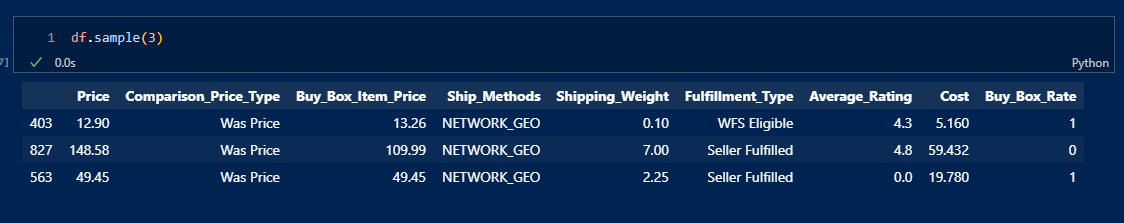

Modelimiz verilen 4 veri icin ilk veri icin 1. , 2. ve 4. veriler icin sifir yani fiyatin olumsuz oldugunu, 3. veriler icin 1 i fiyatin olumlu yani buybox oranini alabilecegi sonucunu verdi. 